## Assignment 3 Part 3: House Price Dataset


Importing libraries and importing train.csv

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
sns.set()
house = pd.read_csv("train.csv")

**Check the head of the DataFrame and getting information of the data.**

In [3]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

We need to perform exploratory data analysis and see if there is any correlation between the variables and analyze the distribution of the dataset.

I will look into cross correlation between each variable.

**1. Cross Correlation Table**

In [11]:
corr_with_price = house.corr()['SalePrice']
corr_with_price

C:\Users\andre\AppData\Local\Temp\ipykernel_10148\2732899089.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_with_price = house.corr()['SalePrice']


Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePr

Heatmap:

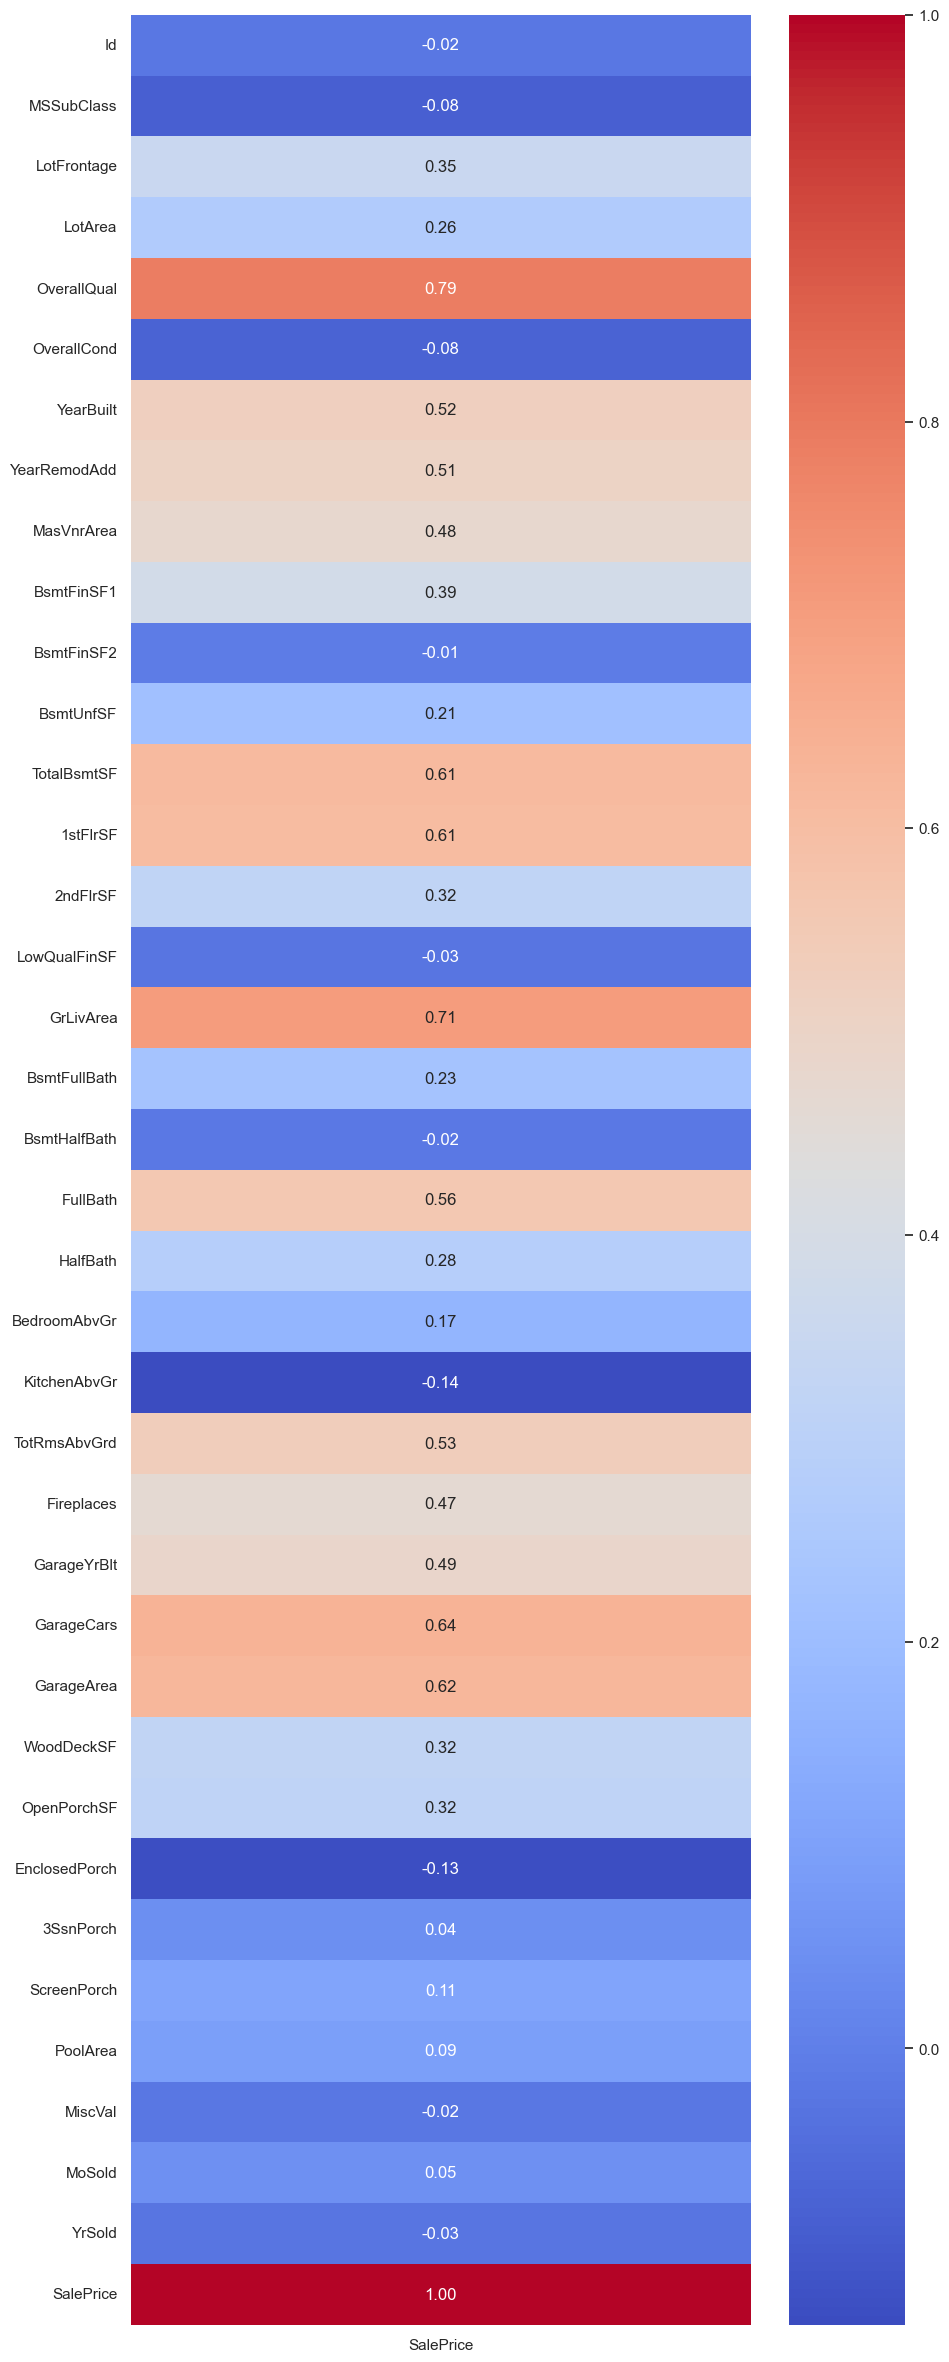

In [76]:
plt.figure(figsize=(10, 30))
sns.heatmap(corr_with_price.to_frame(), annot=True, cmap="coolwarm", fmt=".2f")
plt.savefig("heatmap_houseprice.png")

**Top 6 Correlation with SalePrice from the heatmap**
(in no particular order)

- OverallQual
- TotalBsmtSF
- 1stFlrSF
- GrLivArea
- GarageCars
- GarageArea

We are going to draw joint plot between those variables vs. SalePrice

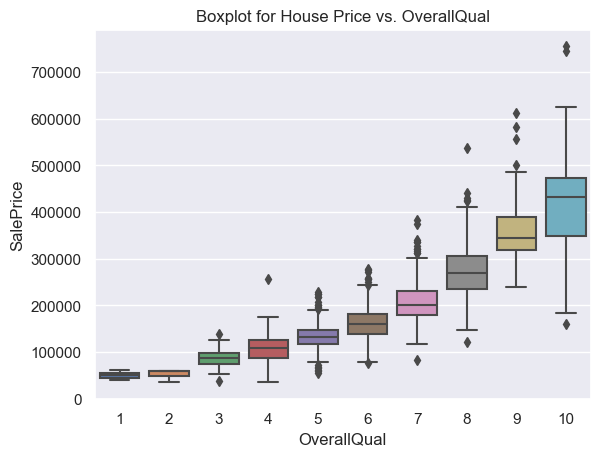

In [56]:
sns.boxplot(x="OverallQual", y="SalePrice", data=house)
plt.title("Boxplot for House Price vs. OverallQual")
plt.savefig("boxplot_price_OverallQual.png")

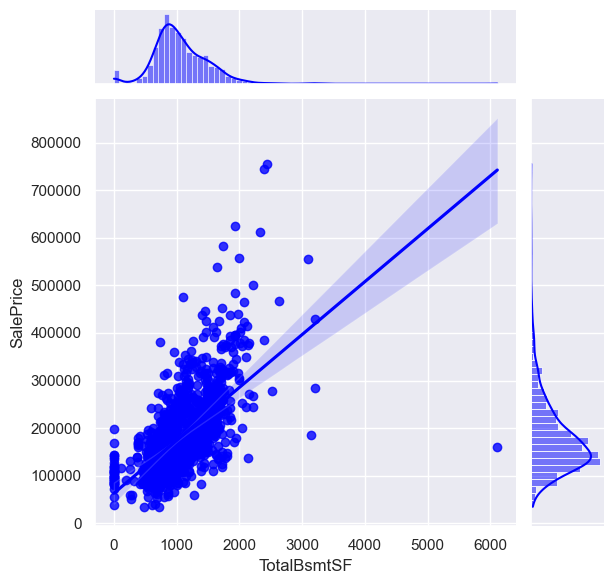

In [57]:
sns.jointplot(x = 'TotalBsmtSF', y ='SalePrice', data = house, kind = 'reg', color = 'blue')
plt.savefig("jointplot_price_TotalBsmtSF.png")

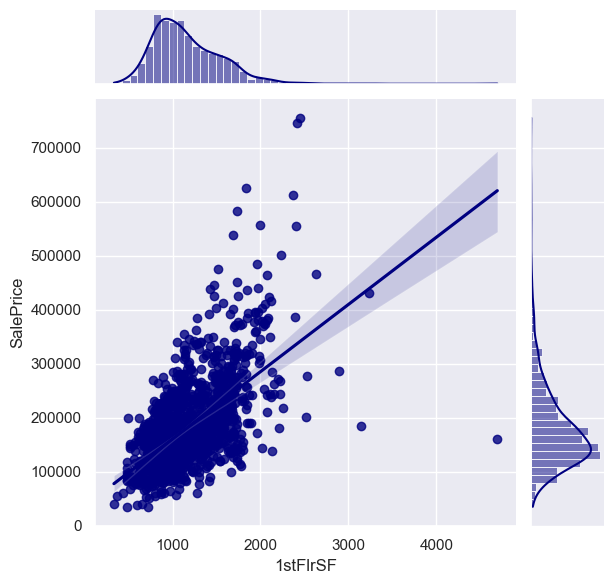

In [58]:
sns.jointplot(x = '1stFlrSF', y ='SalePrice', data = house, kind = 'reg', color = 'navy')
plt.savefig("jointplot_price_1stFlrSF.png")

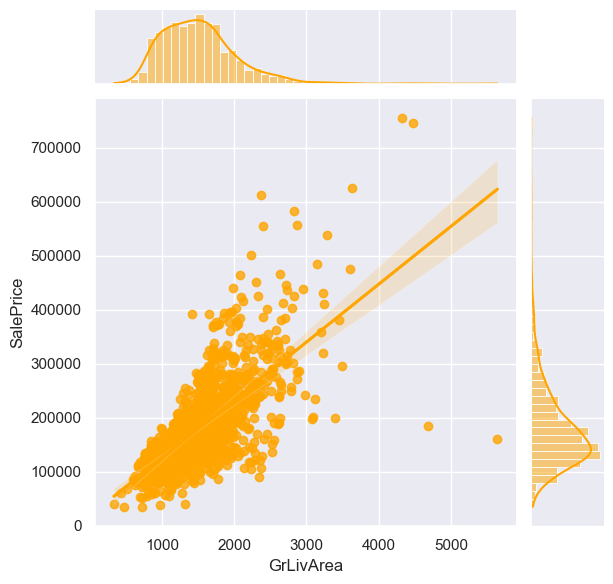

In [59]:
sns.jointplot(x = 'GrLivArea', y ='SalePrice', data = house, kind = 'reg', color = 'orange')
plt.savefig("jointplot_price_GrLivArea.png")

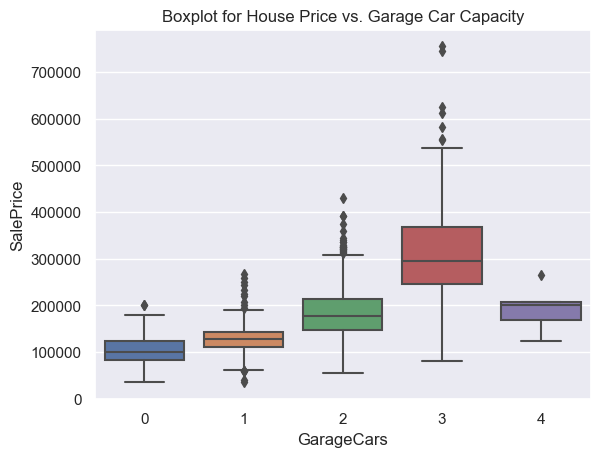

In [60]:
sns.boxplot(x="GarageCars", y="SalePrice", data=house)
plt.title("Boxplot for House Price vs. Garage Car Capacity")
plt.savefig("boxplot_price_GarageCars.png")

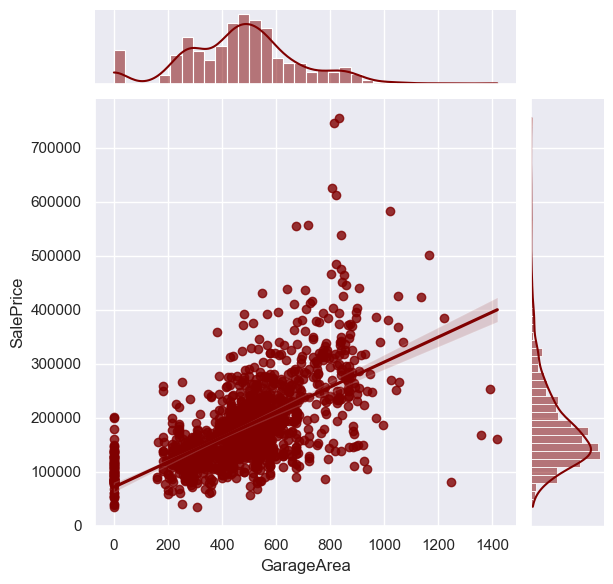

In [61]:
sns.jointplot(x = 'GarageArea', y ='SalePrice', data = house, kind = 'reg', color = 'maroon')
plt.savefig("jointplot_price_GarageArea.png")